In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

PATH_1 = 'latent_codes/seed0001/projected_w.npz'
PATH_2 = 'latent_codes/seed0002/projected_w.npz'

with open('ffhq.pkl', 'rb') as f:
    G = pickle.load(f)['G_ema'].cuda()

def interpolate_points(p1, p2, n_steps=10):
    # interpolate ratios between the points
    ratios = np.linspace(0, 1, num=n_steps)
    # linear interpolate vectors
    vectors = list()
    for ratio in ratios:
        v = (1.0 - ratio) * p1 + ratio * p2
        vectors.append(v)
    return np.asarray(vectors)

img1 = np.load(PATH_1)['w']    
img2 = np.load(PATH_2)['w']

interpolated = interpolate_points(img1, img2)
# generate images
X = G.synthesis(torch.Tensor(interpolated[:, 0, :, :]).cuda()).cpu()
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0

# plotting
fig, ax = plt.subplots(2,5, figsize=(20,10))
for i in range(10):
    x = X[i]
    # turn off axis
    ax[i//5, i%5].axis('off')
    # plot raw pixel data
    ax[i//5, i%5].imshow(x.detach().permute(1,2,0))
plt.tight_layout()
plt.show()

NameError: name 'torch' is not defined

In [1]:
%load_ext autoreload
%autoreload 2    

In [2]:
# import pandas as pd  
import numpy as np
import pickle

import os
import numpy as np
import glob
import PIL.Image as Image

#pip install torchsummary
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision import models
from torchsummary import summary
import torch.optim as optim
from time import time

import matplotlib.pyplot as plt
from IPython.display import clear_output
from stylegan2_ada_pytorch.projector import project #torch_utils, dnnlib
import torch_utils
import dnnlib
import warnings
warnings.filterwarnings("ignore")

In [3]:
with open('ffhq.pkl', 'rb') as f:
    G = pickle.load(f)['G_ema'].cuda()  # torch.nn.Module
z = torch.randn([1, G.z_dim]).cuda()    # latent codes
c = None                                # class labels (not used in this example)
img = G(z, c)                           # NCHW, float32, dynamic range [-1, +1]

Setting up PyTorch plugin "bias_act_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


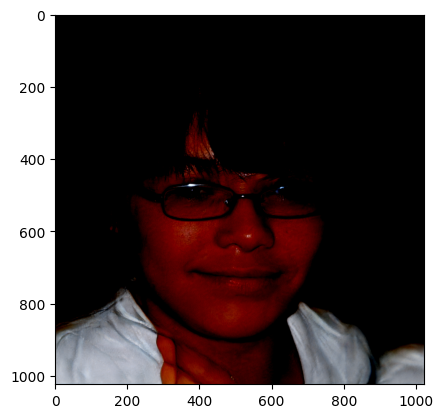

In [4]:
plt.imshow(img.detach().cpu().squeeze().permute(1,2,0))

In [5]:
if torch.cuda.is_available():
    print(":)")
else:
    print(":(")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

:)


In [6]:
def interpolate_points(p1, p2, n_steps=10):
    # interpolate ratios between the points
    ratios = np.linspace(0, 1, num=n_steps)
    # linear interpolate vectors
    vectors = list()
    for ratio in ratios:
        v = (1.0 - ratio) * p1 + ratio * p2
        vectors.append(v)
    return np.asarray(vectors)

In [7]:
from numpy import load

data = load('latent_codes/seed0001/projected_w.npz')
lst = data.files
for item in lst:
#     print(item)
    img1 = data[item]#[:, 0, :]
    
data = load('latent_codes/seed0002/projected_w.npz')
lst = data.files
for item in lst:
#     print(item)
    img2 = data[item]#[:, 0, :]

interpolated = interpolate_points(img1, img2)
interpolated.shape

(10, 1, 18, 512)

In [8]:
print(torch.Tensor(interpolated).device)
# generate images
X = G.synthesis(torch.Tensor(interpolated[:, 0, :, :]).cuda()).cpu()
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0

cpu
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


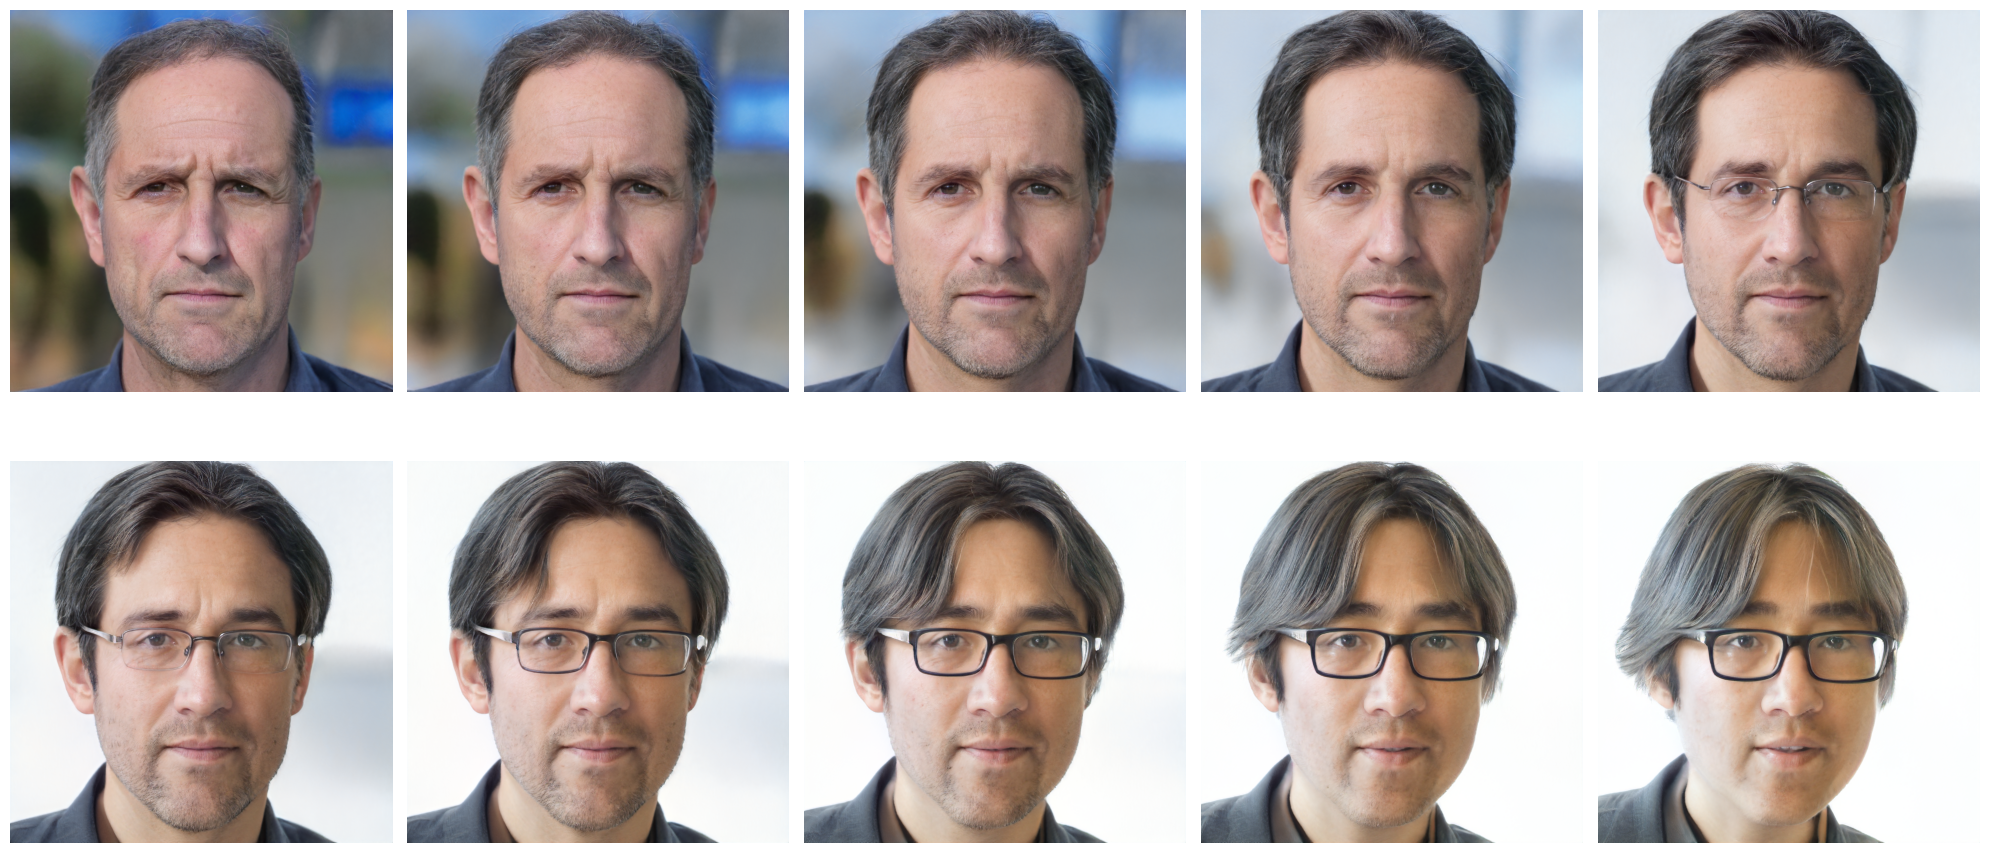

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,5, figsize=(20,10))

for i in range(10):
    x = X[i]
    # define subplot
#     ax.subplot(2, 5, 1 + i)
    # turn off axis
    ax[i//5, i%5].axis('off')
    # plot raw pixel data
    ax[i//5, i%5].imshow(x.detach().permute(1,2,0))
plt.tight_layout()
plt.show()

In [ ]:
# Generate random image
python ~/course02514/stylegan2-ada-pytorch/generate.py --outdir=images --trunc=1 --seeds=1,2,3,4 --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/metfaces.pkl

# Project image
python ~/course02514/stylegan2-ada-pytorch/projector.py --outdir=latent_codes/seed0001 --target=images/seed0001.png --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl --save-video=False